In [1]:
%matplotlib ipympl

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

## Dot Product

In [24]:


# Project vector v1 onto v2
def project(v1, v2):
    return (np.dot(v1, v2) / np.dot(v2, v2)) * v2

# Rotate vector
def rotate_vector(v, angle):
    radians = np.deg2rad(angle)
    rotation_matrix = np.array([
        [np.cos(radians), -np.sin(radians)],
        [np.sin(radians), np.cos(radians)]
    ])
    return np.dot(rotation_matrix, v)

def create_plot(xlim = (-6,6), ylim = (-6,6)):
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.1, bottom=0.25)
    ax.set_aspect('equal')
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    
    return ax
    

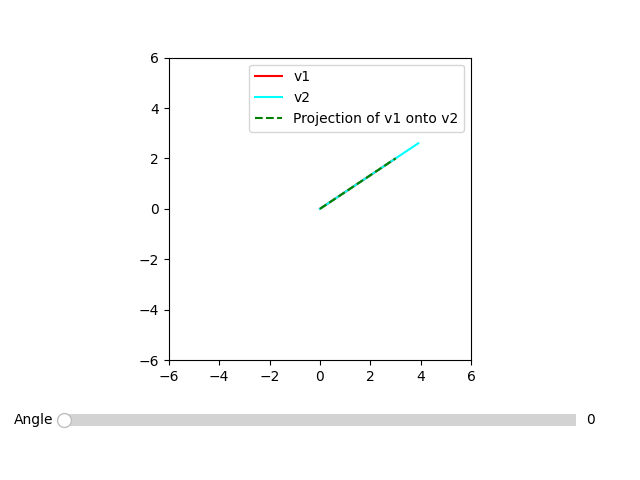

In [31]:
# Initial vectors
v1 = np.array([3, 2])
v2 = np.array([3, 2]) * 1.3

# Initial projection
v1_proj = project(v1, v2)

# Create plot
ax = create_plot(xlim = (-6,6), ylim = (-6,6))

# Plot vector v1, vector v2, and the projection
vector_v1, = ax.plot([0, v1[0]], [0, v1[1]], 'r', label='v1')
vector_v2, = ax.plot([0, v2[0]], [0, v2[1]], 'cyan', label='v2')
vector_proj, = ax.plot([0, v1_proj[0]], [0, v1_proj[1]], 'g--', label='Projection of v1 onto v2')

# Slider for rotating v1
ax_angle = plt.axes([0.1, 0.1, 0.8, 0.05]) # [x0, y0] to [x1,y1]
slider_angle = Slider(ax_angle, 'Angle', 0, 360, valinit=0)

# Update function
def update(val):
    """
    Updates when the slider is changed. 

    1. Read the slider value
    2. Rotate the vector
    3. Update v1 and its projection. v2 remains unchanged.
    """
    
    angle = slider_angle.val
    v1_rot = rotate_vector(v1, angle)
    v1_proj_rot = project(v1_rot, v2)
    
    vector_v1.set_xdata([0, v1_rot[0]])
    vector_v1.set_ydata([0, v1_rot[1]])
    vector_proj.set_xdata([0, v1_proj_rot[0]])
    vector_proj.set_ydata([0, v1_proj_rot[1]])
    
    fig.canvas.draw_idle()

# Call update function on slider value change
slider_angle.on_changed(update)

# Add legend and show plot
ax.legend()
plt.show()


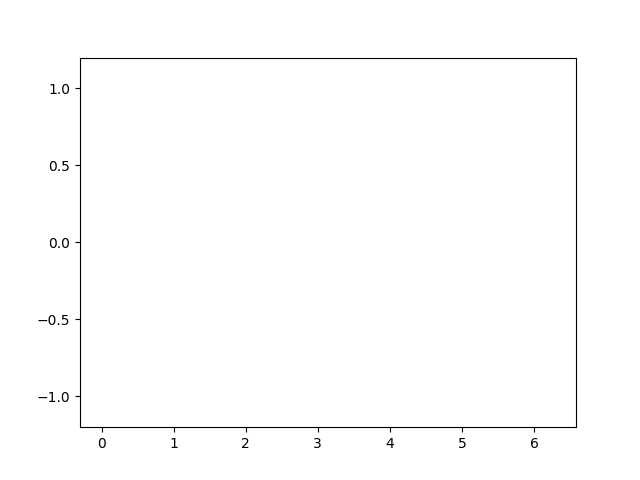

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

points = 50

x = np.linspace(0, 2 * np.pi, points)
y = np.sin(x)

fig, ax = plt.subplots()
ax.set_xlim(-0.3, 2 * np.pi + 0.3)
ax.set_ylim(-1.2, 1.2)

def animate(i):

    if i == 0:
#        fig.clear()
        ax.plot(x[i], y[i], 'ro')
    else:
#        fig.clear()
        ax.plot(x[i-1], y[i-1], 'bo')
        ax.plot(x[i], y[i], 'ro')

anim = FuncAnimation(fig, animate, frames=points, repeat=False, interval=150)

plt.show()